In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install tensorflow_decision_forests --upgrade


     |████████████████████████████████| 6.2MB 7.6MB/s 


In [3]:
!pip install tensorflow==2.5.0


In [4]:
!pip install -q wurlitzer


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv('/content/sample_data/train.csv')
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [7]:
test = pd.read_csv('/content/sample_data/test.csv')
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
sample_submission = pd.read_csv('/content/sample_data/sample_submission.csv')
sample_submission.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [9]:
train.drop('id', axis=1, inplace = True)
test.drop('id', axis=1, inplace = True)

In [10]:
train_copy = train.copy()

In [11]:
train.drop('target', axis=1, inplace = True)

In [12]:
data = pd.concat([train,test], axis=0)
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [13]:
train = data[:100000]
test = data[100000:]

In [14]:
train = pd.concat([train,train_copy['target']], axis=1)
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [15]:
train.replace({'Class_1': 0, 'Class_2': 1, 'Class_3':2, 'Class_4': 3}, inplace = True)

In [16]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [17]:
train.shape

(100000, 51)

In [18]:
train_df = train[0:80000]
eval_df = train[80000:]

In [19]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label = 'target')

In [20]:
eval_ds = tfdf.keras.pd_dataframe_to_tf_dataset(eval_df, label = 'target')

In [21]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label = None)

In [22]:
model = tfdf.keras.GradientBoostedTreesModel(num_trees=100, growing_strategy="BEST_FIRST_GLOBAL", max_depth=8,hyperparameter_template="benchmark_rank1")

In [23]:
model.compile(metrics=["accuracy"])

In [24]:
model.fit(train_ds)

1250/1250 [==============================] - 8s 3ms/step


In [25]:
model.evaluate(eval_ds)

313/313 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5878


[0.0, 0.5878499746322632]

In [26]:
model.summary()


Model: "gradient_boosted_trees_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (50):
	feature_0
	feature_1
	feature_10
	feature_11
	feature_12
	feature_13
	feature_14
	feature_15
	feature_16
	feature_17
	feature_18
	feature_19
	feature_2
	feature_20
	feature_21
	feature_22
	feature_23
	feature_24
	feature_25
	feature_26
	feature_27
	feature_28
	feature_29
	feature_3
	feature_30
	feature_31
	feature_32
	feature_33
	feature_34
	feature_35
	feature_36
	feature_37
	feature_38
	feature_39
	feature_4
	feature_40
	feature_41
	feature_42
	feature_43
	feature_44
	feature_45
	feature_46
	feature_47
	feature_48
	feature_49
	feature_5
	feature_6
	feature_7
	feature_8
	feature_9

No weights

Variable I

In [27]:
model.save('TPD_MAY_2021_1')


INFO:tensorflow:Assets written to: TPD_MAY_2021_1/assets


INFO:tensorflow:Assets written to: TPD_MAY_2021_1/assets


In [28]:
model.make_inspector().training_logs()


[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=None, accuracy=0.57955402135849, loss=1.3273941278457642, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=2, evaluation=Evaluation(num_examples=None, accuracy=0.5801804065704346, loss=1.2817726135253906, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=3, evaluation=Evaluation(num_examples=None, accuracy=0.5801804065704346, loss=1.2458091974258423, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=4, evaluation=Evaluation(num_examples=None, accuracy=0.5804309844970703, loss=1.2173620462417603, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=5, evaluation=Evaluation(num_examples=None, accuracy=0.5803056955337524, loss=1.1945865154266357, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=6, evaluation=Evaluation(num_examples=None, accuracy=0.579804539680481, loss=1.1763499975204468, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=7, evaluation=Evaluation(num_examples=None, accuracy=0.5799298286

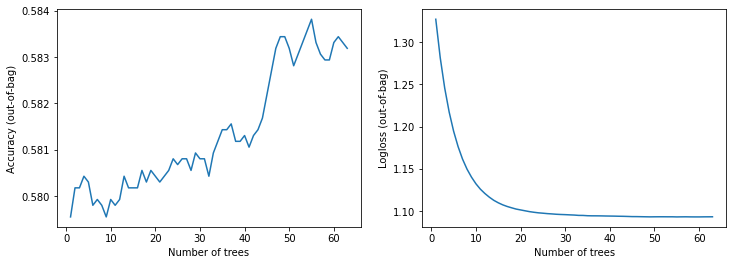

In [29]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [30]:
y_pred = model.predict(test_ds)

In [31]:
sample_submission.iloc[:,1:5] = y_pred
sample_submission

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.097610,0.614888,0.167938,0.119564
1,100001,0.082969,0.644810,0.187346,0.084875
2,100002,0.074632,0.644654,0.190856,0.089859
3,100003,0.067749,0.507846,0.337827,0.086578
4,100004,0.071847,0.600228,0.217192,0.110733
...,...,...,...,...,...
49995,149995,0.088866,0.688796,0.154697,0.067640
49996,149996,0.093316,0.631475,0.154594,0.120615
49997,149997,0.094426,0.552258,0.214730,0.138586
49998,149998,0.080093,0.612628,0.164497,0.142782


In [ ]:
sample_submission.to_csv('submission_df.csv',index=False)